<a href="https://colab.research.google.com/github/harekrushna93/HM/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Librabry

In [1]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.image as mpimg
import random
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_path = '/content/drive/MyDrive/data/cat vs dog/data'
os.listdir(data_path)

['dog', 'cat']

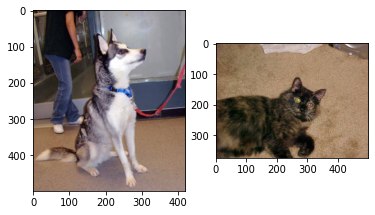

In [3]:
f_img = []
for img in os.listdir(data_path):
  path = os.path.join(data_path,img)
  f_img_path = os.path.join(path, os.listdir(path)[0])
  img = mpimg.imread(f_img_path)
  f_img.append(img)
for i in range(len(f_img)):
  plt.subplot(1,2,i+1)
  plt.imshow(f_img[i])

Creating Train set and Test set

In [4]:
os.makedirs('/content/train_ds')
os.makedirs('/content/test_ds')

In [5]:
def train_test_split(source_dir,train_dir,test_dir,train_size):
  classes = os.listdir(source_dir)
  for c in classes:
    p1 = os.path.join(train_dir,f'{c}')
    p2 = os.path.join(test_dir,f'{c}')
    os.makedirs(p1)
    os.makedirs(p2)
    p = os.path.join(source_dir,c)
    c_imgs = os.listdir(p)
    random.seed = 42
    train_files = random.sample(c_imgs, int(len(c_imgs)*train_size))
    test_files = [x for x in c_imgs if x not in train_files]
    for file_name in train_files:
      source = os.path.join(p,file_name)
      destination = os.path.join(p1,file_name)
      shutil.copy(source,destination)
    for file_name in test_files:
      source = os.path.join(p,file_name)
      destination = os.path.join(p2,file_name)
      shutil.copy(source, destination)

In [6]:
train_test_split(data_path,'/content/train_ds','/content/test_ds',0.8)

In [7]:
print(len(os.listdir('/content/test_ds/cat')))
print(len(os.listdir('/content/test_ds/dog')))
print(len(os.listdir('/content/train_ds/cat')))
print(len(os.listdir('/content/train_ds/cat')))

32
32
128
128


In [8]:
train = keras.utils.image_dataset_from_directory('/content/train_ds',labels = 'inferred',label_mode = 'categorical',image_size = (256,256),validation_split = 0.2,subset = 'training',seed = 42)

valid = keras.utils.image_dataset_from_directory('/content/train_ds',labels = 'inferred', label_mode = 'categorical',
                                                image_size = (256,256),
                                                validation_split = 0.2,
                                                subset = 'validation',
                                                seed = 42)

test = keras.utils.image_dataset_from_directory('/content/test_ds',
                                                labels = 'inferred',
                                                label_mode = 'categorical',
                                                image_size = (256,256))
 

Found 256 files belonging to 2 classes.
Using 205 files for training.
Found 256 files belonging to 2 classes.
Using 51 files for validation.
Found 64 files belonging to 2 classes.


simple CNN model

In [9]:
inputs =  keras.Input(shape = (256,256,3))
x = keras.layers.Rescaling(1./255)(inputs)
x = keras.layers.Conv2D(64,3,padding='same', activation = 'relu')(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64,3,padding='same', activation = 'relu')(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(1000)(x)
output = keras.layers.Dense(2,activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                         

In [10]:
model.compile(loss = 'binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate = 0.001),metrics = ['accuracy'])
history = model.fit(train, epochs = 10, batch_size=32, validation_data = valid)

Epoch 1/10
7/7 [==============================] - 12s 328ms/step - loss: 14.1953 - accuracy: 0.5317 - val_loss: 0.6816 - val_accuracy: 0.6078
Epoch 2/10
7/7 [==============================] - 1s 164ms/step - loss: 0.6938 - accuracy: 0.6195 - val_loss: 0.6969 - val_accuracy: 0.5098
Epoch 3/10
7/7 [==============================] - 1s 163ms/step - loss: 0.5885 - accuracy: 0.7366 - val_loss: 0.8178 - val_accuracy: 0.4510
Epoch 4/10
7/7 [==============================] - 1s 163ms/step - loss: 0.4644 - accuracy: 0.8293 - val_loss: 0.8377 - val_accuracy: 0.5294
Epoch 5/10
7/7 [==============================] - 1s 165ms/step - loss: 0.3232 - accuracy: 0.8829 - val_loss: 1.2049 - val_accuracy: 0.5294
Epoch 6/10
7/7 [==============================] - 1s 165ms/step - loss: 0.3098 - accuracy: 0.8878 - val_loss: 1.2373 - val_accuracy: 0.5686
Epoch 7/10
7/7 [==============================] - 1s 163ms/step - loss: 0.2378 - accuracy: 0.9561 - val_loss: 0.9593 - val_accuracy: 0.6275
Epoch 8/10
7/7 [==

In [18]:
model.evaluate(test)

2/2 [==============================] - 0s 63ms/step - loss: 2.0007 - accuracy: 0.5938


[2.0007152557373047, 0.59375]

Model using pretrained model Xception

In [20]:
from tensorflow.keras.applications import Xception

xception_model = Xception(include_top = False,weights='imagenet', input_shape = (256,256,3))
for layers in xception_model.layers:
  layers.tranable = False


T_model = keras.models.Sequential()
T_model.add(xception_model)
T_model.add(keras.layers.Flatten())
T_model.add(keras.layers.Dense(2, activation = 'softmax'))
T_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                 262146    
                                                                 
Total params: 21,123,626
Trainable params: 21,069,098
Non-trainable params: 54,528
_________________________________________________________________


In [21]:
T_model.compile(loss = 'BinaryCrossentropy',optimizer=keras.optimizers.Adam(learning_rate = 0.001),metrics = ['accuracy'])
history = T_model.fit(train, epochs = 10,validation_data = valid)

Epoch 1/10
7/7 [==============================] - 16s 1s/step - loss: 0.6080 - accuracy: 0.8146 - val_loss: 0.8970 - val_accuracy: 0.5098
Epoch 2/10
7/7 [==============================] - 5s 718ms/step - loss: 0.5377 - accuracy: 0.7415 - val_loss: 128.9208 - val_accuracy: 0.5294
Epoch 3/10
7/7 [==============================] - 5s 718ms/step - loss: 0.2046 - accuracy: 0.8829 - val_loss: 470.6815 - val_accuracy: 0.4706
Epoch 4/10
7/7 [==============================] - 5s 723ms/step - loss: 0.0986 - accuracy: 0.9415 - val_loss: 174.1281 - val_accuracy: 0.4706
Epoch 5/10
7/7 [==============================] - 5s 731ms/step - loss: 0.0666 - accuracy: 0.9659 - val_loss: 75.3035 - val_accuracy: 0.4902
Epoch 6/10
7/7 [==============================] - 5s 717ms/step - loss: 0.2761 - accuracy: 0.9366 - val_loss: 88.7343 - val_accuracy: 0.6275
Epoch 7/10
7/7 [==============================] - 5s 721ms/step - loss: 0.4258 - accuracy: 0.8976 - val_loss: 33.4578 - val_accuracy: 0.6078
Epoch 8/10
7/

In [22]:
T_model.evaluate(test)

2/2 [==============================] - 0s 166ms/step - loss: 19.9895 - accuracy: 0.7812


[19.989511489868164, 0.78125]

Data Agumentation

In [9]:
train_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range=30,
                               width_shift_range = 0.2,
                               height_shift_range= 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               fill_mode='nearest',
                               validation_split = 0.2)
test_gen = ImageDataGenerator(rescale = 1./255)
train_generated = train_gen.flow_from_directory('/content/train_ds',
                                                batch_size = 32,
                                                target_size = (256,256),
                                                class_mode='categorical',
                                                subset = 'training')
val_generated = train_gen.flow_from_directory('/content/train_ds',
                                              batch_size = 32,
                                              target_size = (256,256),
                                              class_mode = 'categorical',
                                              subset = 'validation')
test_generated = train_gen.flow_from_directory('/content/test_ds')

Found 206 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


Simple CNN model trained on agumented data

In [13]:
inputs =  keras.Input(shape = (256,256,3))
x = keras.layers.Conv2D(64,3,padding='same', activation = 'relu')(inputs)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64,3,padding='same', activation = 'relu')(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
#x = keras.layers.Dense(150,activation = 'relu')(x)
output = keras.layers.Dense(2,activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 262144)            0   

In [14]:
model.compile(loss = 'binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate = 0.0001),metrics = ['accuracy'])
history = model.fit(train_generated, epochs = 10, validation_data = val_generated)

Epoch 1/10
7/7 [==============================] - 5s 678ms/step - loss: 0.7155 - accuracy: 0.5000 - val_loss: 0.7137 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 4s 578ms/step - loss: 0.7012 - accuracy: 0.4903 - val_loss: 0.6888 - val_accuracy: 0.4800
Epoch 3/10
7/7 [==============================] - 4s 574ms/step - loss: 0.6847 - accuracy: 0.5340 - val_loss: 0.6857 - val_accuracy: 0.6200
Epoch 4/10
7/7 [==============================] - 4s 573ms/step - loss: 0.6901 - accuracy: 0.4854 - val_loss: 0.6873 - val_accuracy: 0.5600
Epoch 5/10
7/7 [==============================] - 4s 574ms/step - loss: 0.6752 - accuracy: 0.5680 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 4s 569ms/step - loss: 0.6786 - accuracy: 0.5000 - val_loss: 0.6769 - val_accuracy: 0.5400
Epoch 7/10
7/7 [==============================] - 4s 578ms/step - loss: 0.6725 - accuracy: 0.5680 - val_loss: 0.6785 - val_accuracy: 0.6000
Epoch 8/10
7/7 [====

In [15]:
model.evaluate(test_generated)

2/2 [==============================] - 1s 476ms/step - loss: 0.6781 - accuracy: 0.5625


[0.6780860424041748, 0.5625]

Model using pretrained model Xception, trained on agumented data

In [18]:
model = keras.models.Sequential()
model.add(xception_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                 262146    
                                                                 
Total params: 21,123,626
Trainable params: 21,069,098
Non-trainable params: 54,528
_________________________________________________________________


In [19]:
model.compile(loss = 'BinaryCrossentropy',optimizer=keras.optimizers.Adam(learning_rate = 0.001),metrics = ['accuracy'])
history = model.fit(train_generated, epochs = 10,validation_data = val_generated)

Epoch 1/10
7/7 [==============================] - 58s 2s/step - loss: 0.7547 - accuracy: 0.7476 - val_loss: 3.8515 - val_accuracy: 0.8400
Epoch 2/10
7/7 [==============================] - 7s 1000ms/step - loss: 0.1268 - accuracy: 0.9612 - val_loss: 1.5536 - val_accuracy: 0.9600
Epoch 3/10
7/7 [==============================] - 6s 876ms/step - loss: 0.1373 - accuracy: 0.9320 - val_loss: 3.9753 - val_accuracy: 0.9000
Epoch 4/10
7/7 [==============================] - 7s 900ms/step - loss: 0.1922 - accuracy: 0.9612 - val_loss: 1.5659 - val_accuracy: 0.9200
Epoch 5/10
7/7 [==============================] - 6s 969ms/step - loss: 0.1244 - accuracy: 0.9466 - val_loss: 0.1127 - val_accuracy: 0.9800
Epoch 6/10
7/7 [==============================] - 7s 886ms/step - loss: 0.1360 - accuracy: 0.9660 - val_loss: 1.0189 - val_accuracy: 0.9400
Epoch 7/10
7/7 [==============================] - 6s 827ms/step - loss: 0.0789 - accuracy: 0.9709 - val_loss: 5.3173 - val_accuracy: 0.9200
Epoch 8/10
7/7 [=====

In [20]:
model.evaluate(test_generated)

2/2 [==============================] - 1s 495ms/step - loss: 5.4696 - accuracy: 0.8438


[5.469616889953613, 0.84375]

Data augmentation is helpfull to avoid over fitting and increse accuracy of the model.
 Before augmentation both the model accuracy on test data is less. after agumentation test accuracy increase on test data in both the models.
